Importing packages

In [188]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

Loading Datasets

In [61]:
cols_list1 = ["airline"," source airport", " destination apirport"]
G = pd.read_csv('/content/routes_FL3.csv',usecols=cols_list1)

cols_list2 = ["Name","City","Country","IATA","Latitude","Longitude"]
airport_data = pd.read_csv('/content/airports_FL3.csv',usecols=cols_list2)

In [199]:
print(G.shape)
G

(67663, 3)


,airline,source airport,destination apirport
0,2B,AER,KZN
1,2B,ASF,KZN
2,2B,ASF,MRV
3,2B,CEK,KZN
4,2B,CEK,OVB
...,...,...,...
67658,ZL,WYA,ADL
67659,ZM,DME,FRU
67660,ZM,FRU,DME
67661,ZM,FRU,OSS


In [200]:
print(airport_data.shape)
airport_data

(7698, 6)


,Name,City,Country,IATA,Latitude,Longitude
0,Goroka Airport,Goroka,Papua New Guinea,GKA,-6.081690,145.391998
1,Madang Airport,Madang,Papua New Guinea,MAG,-5.207080,145.789001
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,-5.826790,144.296005
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,-6.569803,146.725977
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,-9.443380,147.220001
...,...,...,...,...,...,...
7693,Rogachyovo Air Base,Belaya,Russia,\N,71.616699,52.478298
7694,Ulan-Ude East Airport,Ulan Ude,Russia,\N,51.849998,107.737999
7695,Krechevitsy Air Base,Novgorod,Russia,\N,58.625000,31.385000
7696,Desierto de Atacama Airport,Copiapo,Chile,CPO,-27.261200,-70.779198


In [237]:
airport_df = airport_data.drop(['Latitude', 'Longitude'], axis=1)
airport_df = airport_df[airport_df.IATA != '\\N']
print(airport_df.shape)
airport_df

(6072, 4)


,Name,City,Country,IATA
0,Goroka Airport,Goroka,Papua New Guinea,GKA
1,Madang Airport,Madang,Papua New Guinea,MAG
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM
...,...,...,...,...
7684,Bilogai-Sugapa Airport,Sugapa-Papua Island,Indonesia,UGU
7687,Ramon Airport,Eilat,Israel,ETM
7688,Rustaq Airport,Al Masna'ah,Oman,MNH
7689,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY


#DRAWING GRAPH

In [272]:
G_df = nx.from_pandas_edgelist(G.head(10000), " source airport"," destination apirport", create_using=nx.DiGraph())

In [273]:
available_IATA=list(airport_data["IATA"])
nodes_in_G_df=list(G_df.nodes())

In [274]:
len(available_IATA)

7698

In [275]:
len(nodes_in_G_df)

1581

In [276]:
dict_pos={}
for i in nodes_in_G_df:
    x=np.array(airport_data.loc[airport_data['IATA'].isin([i])][["Longitude","Latitude"]])
    if len(x)==0:
        G_df.remove_node(i) 
        continue
    else:
        dict_pos[i]=x[0]

In [277]:
dict_pos

{'AER': array([39.9566  , 43.449902]),
 'KZN': array([49.27870178, 55.60620117]),
 'ASF': array([48.00630188, 46.28329849]),
 'MRV': array([43.08190155, 44.22510147]),
 'CEK': array([61.5033  , 55.305801]),
 'OVB': array([82.65070343, 55.01259995]),
 'DME': array([37.90629959, 55.40879822]),
 'NBC': array([52.09249878, 55.56470108]),
 'TGK': array([38.8491667, 47.1983333]),
 'UUA': array([52.80170059, 54.63999939]),
 'EGO': array([36.59009933, 50.64379883]),
 'KGD': array([20.59259987, 54.88999939]),
 'GYD': array([50.04669952, 40.46749878]),
 'LED': array([30.26250076, 59.8003006 ]),
 'SVX': array([60.80270004, 56.74309921]),
 'NJC': array([76.4835968 , 60.94929886]),
 'NUX': array([76.52030182, 66.06939697]),
 'BTK': array([101.69799805,  56.37060165]),
 'IKT': array([104.38899994,  52.26800156]),
 'HTA': array([113.306   ,  52.026299]),
 'KCK': array([108.064,  57.773]),
 'ODO': array([114.24299622,  57.86610031]),
 'UKX': array([105.73000336,  56.8567009 ]),
 'ULK': array([114.8259

In [258]:
print(nx.info(G_df))

Name: 
Type: DiGraph
Number of nodes: 1514
Number of edges: 8918
Average in degree:   5.8904
Average out degree:   5.8904


In [259]:
nx.set_node_attributes(G_df, dict_pos, 'pos')

In [260]:
G_df.edges()

OutEdgeView([('AER', 'KZN'), ('AER', 'DYU'), ('AER', 'KIV'), ('KZN', 'AER'), ('KZN', 'ASF'), ('KZN', 'CEK'), ('KZN', 'DME'), ('KZN', 'EGO'), ('KZN', 'LED'), ('KZN', 'SVX'), ('KZN', 'AYT'), ('ASF', 'KZN'), ('ASF', 'MRV'), ('ASF', 'DME'), ('ASF', 'LED'), ('MRV', 'ASF'), ('MRV', 'RTW'), ('MRV', 'SAW'), ('CEK', 'KZN'), ('CEK', 'OVB'), ('OVB', 'CEK'), ('OVB', 'SVX'), ('OVB', 'BTK'), ('OVB', 'IKT'), ('OVB', 'KRR'), ('OVB', 'LED'), ('OVB', 'MJZ'), ('OVB', 'PYJ'), ('OVB', 'DYU'), ('OVB', 'LBD'), ('DME', 'KZN'), ('DME', 'NBC'), ('DME', 'TGK'), ('DME', 'UUA'), ('DME', 'ASF'), ('DME', 'BHK'), ('DME', 'EGO'), ('DME', 'FEG'), ('DME', 'KSQ'), ('DME', 'NMA'), ('DME', 'NVI'), ('DME', 'SKD'), ('DME', 'TIV'), ('DME', 'KRR'), ('DME', 'LED'), ('DME', 'MJZ'), ('DME', 'PYJ'), ('DME', 'RTW'), ('DME', 'DYU'), ('DME', 'LBD'), ('DME', 'AKX'), ('DME', 'CSY'), ('DME', 'ESL'), ('DME', 'IJK'), ('DME', 'MCX'), ('DME', 'PES'), ('DME', 'PEZ'), ('DME', 'SKX'), ('DME', 'ULV'), ('DME', 'VKT'), ('DME', 'VOZ'), ('DME', 'KI

In [261]:
G_df.nodes()

NodeView(('AER', 'KZN', 'ASF', 'MRV', 'CEK', 'OVB', 'DME', 'NBC', 'TGK', 'UUA', 'EGO', 'KGD', 'GYD', 'LED', 'SVX', 'NJC', 'NUX', 'BTK', 'IKT', 'HTA', 'KCK', 'ODO', 'UKX', 'ULK', 'YKS', 'MJZ', 'AYP', 'LIM', 'CUZ', 'PEM', 'HUU', 'IQT', 'PCL', 'TPP', 'ABJ', 'BOY', 'OUA', 'ACC', 'BKO', 'DKR', 'COO', 'LFW', 'NIM', 'BOG', 'GYE', 'UIO', 'CLO', 'SCY', 'OCC', 'BDS', 'ZRH', 'BOD', 'BRS', 'GVA', 'LPA', 'LCA', 'RMF', 'TFS', 'AJR', 'LYC', 'ARN', 'GEV', 'HAD', 'JKG', 'KRF', 'KSD', 'MHQ', 'OER', 'POR', 'TRF', 'VBY', 'VHM', 'VXO', 'HMV', 'KOK', 'TKU', 'OSL', 'ADQ', 'KLN', 'KYK', 'BSO', 'MNL', 'BXU', 'CBO', 'CGY', 'CRM', 'DGT', 'DWC', 'GES', 'KLO', 'LGP', 'MPH', 'OZC', 'PPS', 'RXS', 'SUG', 'TUG', 'ZAM', 'AUX', 'PMW', 'BRA', 'BSB', 'SSA', 'OPS', 'RAO', 'CAC', 'GRU', 'CGB', 'GYN', 'CGR', 'DOU', 'GIG', 'UBA', 'UDI', 'VDC', 'PLU', 'SJP', 'BRL', 'ORD', 'STL', 'DEC', 'JBR', 'KTN', 'MTM', 'LOS', 'ROB', 'BCN', 'BJL', 'FNA', 'CKY', 'OXB', 'DLA', 'LGW', 'AKV', 'YIK', 'YPX', 'XGR', 'YVP', 'YGL', 'YGW', 'YUL', 'YP

In [262]:
edge_x = []
edge_y = []
for edge in G_df.edges():
    x0, y0 = G_df.nodes[edge[0]]['pos']
    x1, y1 = G_df.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.25, color='#888'), mode='lines')

node_x = []
node_y = []
for node in G_df.nodes():
    x, y = G_df.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(x=node_x, y=node_y,
                        mode='markers', hoverinfo='text', marker=dict( showscale=True, colorscale='YlGnBu',reversescale=True,color=[],size=7.5,
                                        colorbar=dict(thickness=15,title='Node Connections',xanchor='left',titleside='right'),line_width=2))

In [263]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G_df.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1]))+' '+np.array(airport_data.loc[airport_data['IATA'].isin([adjacencies[0]])]["Country"])[0]+' , '+np.array(airport_data.loc[airport_data['IATA'].isin([adjacencies[0]])]["City"])[0])

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [280]:
node_adjacencies[:5]

[3, 8, 4, 3, 2]

In [264]:
node_text[:5]

['# of connections: 3 Russia , Sochi',
 '# of connections: 8 Russia , Kazan',
 '# of connections: 4 Russia , Astrakhan',
 '# of connections: 3 Russia , Mineralnye Vody',
 '# of connections: 2 Russia , Chelyabinsk']

In [279]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph of airport routes',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=10,l=5,r=5,t=10),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=True),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=True)
                )
                )
fig.show()

# GRAPH

In [147]:
GRAPH = nx.from_pandas_edgelist(G, " source airport", " destination apirport",create_using=nx.DiGraph())

In [148]:
print(nx.info(GRAPH))

Name: 
Type: DiGraph
Number of nodes: 3425
Number of edges: 37595
Average in degree:  10.9766
Average out degree:  10.9766


#BETWEENESS CENTRALITY

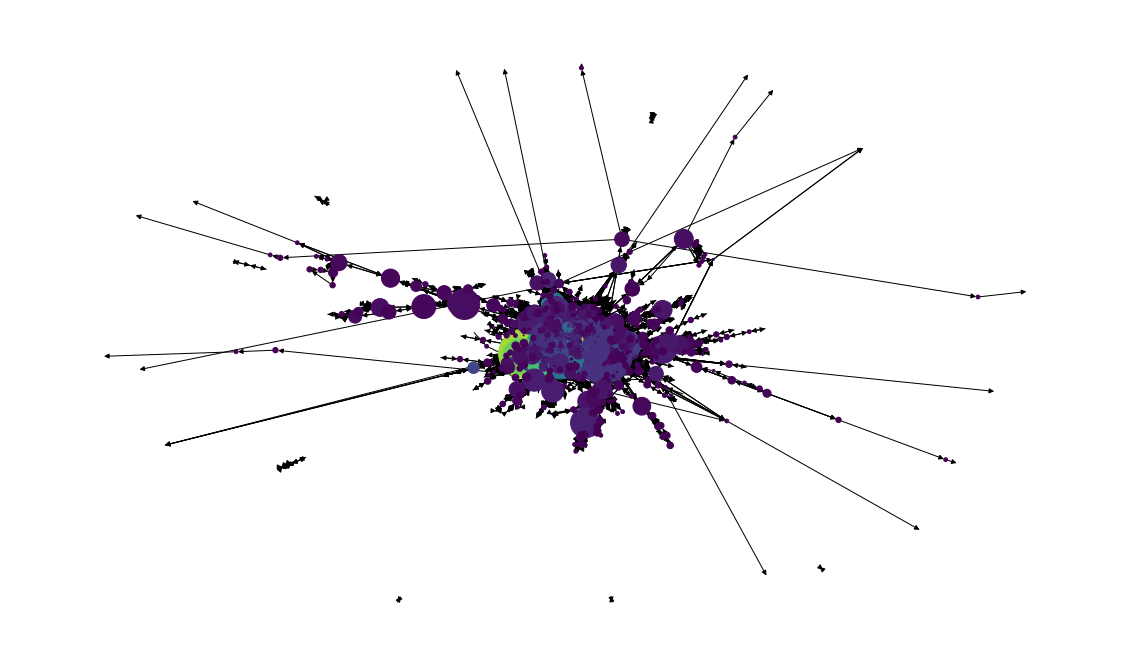

In [281]:
pos = nx.spring_layout(GRAPH)
betCent = nx.betweenness_centrality(GRAPH)
node_color = [20000.0 * GRAPH.degree(v) for v in GRAPH]
node_size =  [v * 50000 for v in betCent.values()]
plt.figure(figsize=(20,12))
nx.draw_networkx(GRAPH, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()

Which airports often act as bridges between other pairs of airports?

In [164]:
b1 = sorted(betCent, key=betCent.get, reverse=True)[:5]
b1

['ANC', 'LAX', 'CDG', 'DXB', 'FRA']

In [165]:
airport_df1 = airport_df.copy()
airport_df1["Betweeness_centrality"] = airport_df1["IATA"].map(betCent)
airport_dfr1 = airport_df1.sort_values(by=['Betweeness_centrality'], ascending=False)
airport_dfr1.head()

,Name,City,Country,IATA,Betweeness_centrality
3574,Ted Stevens Anchorage International Airport,Anchorage,United States,ANC,0.070204
3285,Los Angeles International Airport,Los Angeles,United States,LAX,0.066164
1346,Charles de Gaulle International Airport,Paris,France,CDG,0.061703
2100,Dubai International Airport,Dubai,United Arab Emirates,DXB,0.059350
336,Frankfurt am Main Airport,Frankfurt,Germany,FRA,0.051000


#CLOSENESS CENTRALITY

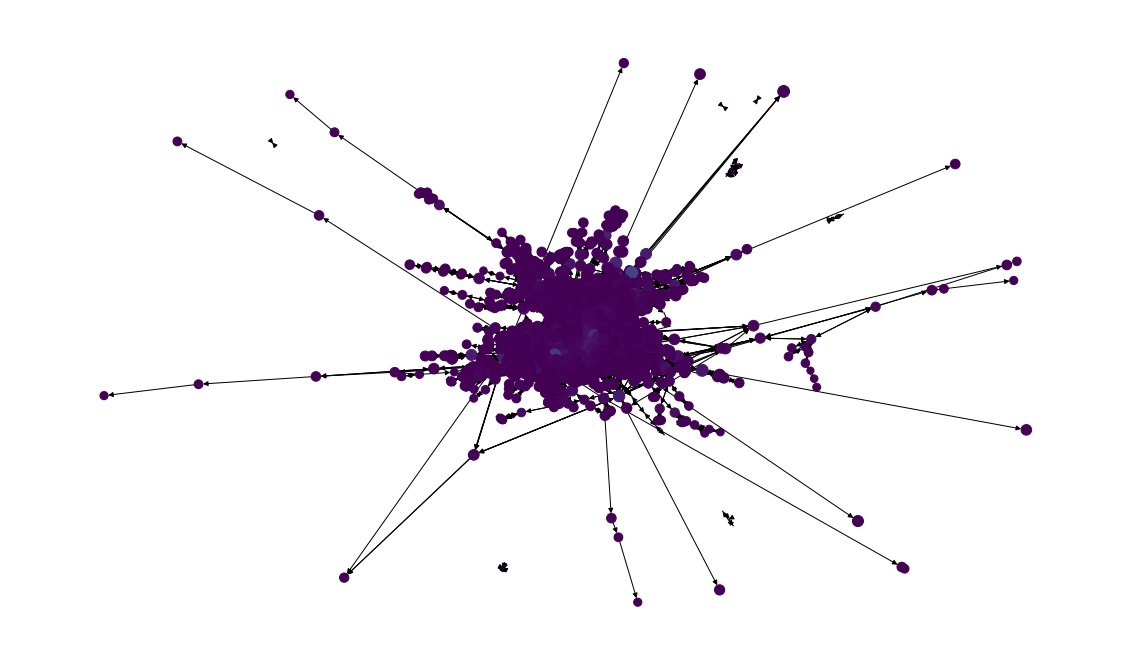

In [282]:
pos = nx.spring_layout(GRAPH)
cloCent = nx.closeness_centrality(GRAPH)
node_color = [20000.0 * GRAPH.degree(v) for v in GRAPH]
node_size =  [v * 500 for v in cloCent.values()]
plt.figure(figsize=(20,12))
nx.draw_networkx(GRAPH, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()

Which airports will allow you to reach all other airports with the lowest average number of airports in between?

In [166]:
c1 = sorted(cloCent, key=cloCent.get, reverse=True)[:5]
c1

['FRA', 'CDG', 'LHR', 'DXB', 'AMS']

In [167]:
airport_df2 = airport_df.copy()
airport_df2["Closeness_centrality"] = airport_df2["IATA"].map(cloCent)
airport_dfr2 = airport_df2.sort_values(by=['Closeness_centrality'], ascending=False)
airport_dfr2.head()

,Name,City,Country,IATA,Closeness_centrality
336,Frankfurt am Main Airport,Frankfurt,Germany,FRA,0.392389
1346,Charles de Gaulle International Airport,Paris,France,CDG,0.389993
502,London Heathrow Airport,London,United Kingdom,LHR,0.388306
2100,Dubai International Airport,Dubai,United Arab Emirates,DXB,0.384084
574,Amsterdam Airport Schiphol,Amsterdam,Netherlands,AMS,0.382932


#DEGREE CENTRALITY

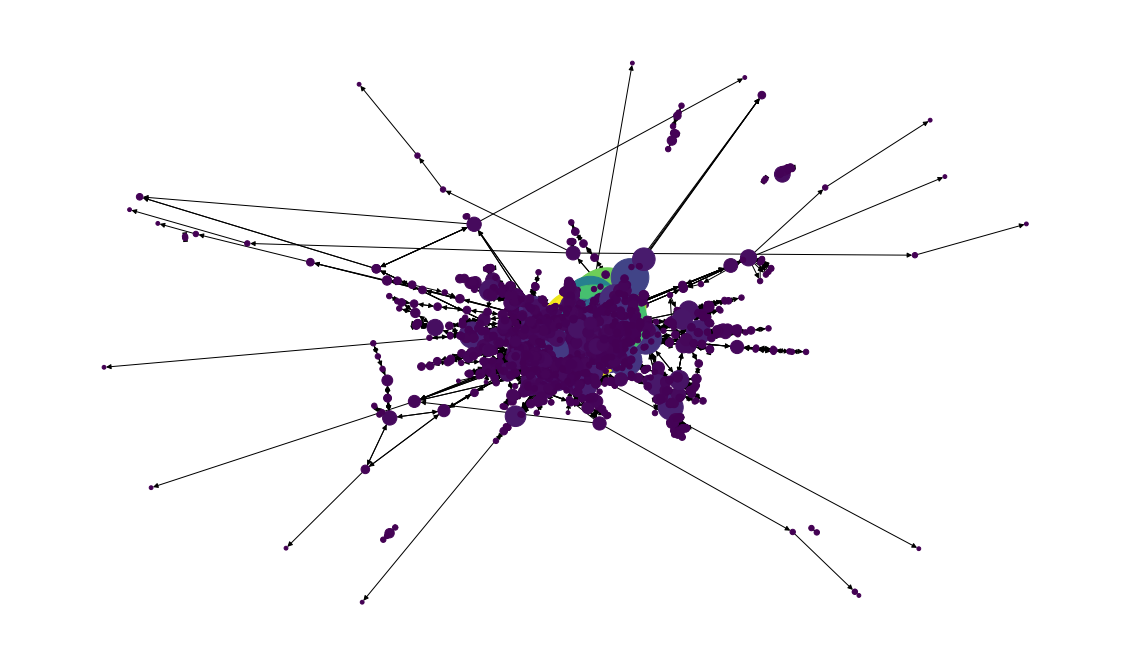

In [283]:
pos = nx.spring_layout(GRAPH)
degCent = nx.degree_centrality(GRAPH)
node_color = [20000.0 * GRAPH.degree(v) for v in GRAPH]
node_size =  [v * 50000 for v in degCent.values()]
plt.figure(figsize=(20,12))
nx.draw_networkx(GRAPH, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()

Which airport has most number of connections

In [168]:
d1 = sorted(degCent, key=degCent.get, reverse=True)[:5]
d1

['FRA', 'CDG', 'AMS', 'IST', 'ATL']

In [169]:
airport_df3 = airport_df.copy()
airport_df3["Degree_centrality"] = airport_df3["IATA"].map(degCent)
airport_dfr3 = airport_df3.sort_values(by=['Degree_centrality'], ascending=False)
airport_dfr3.head()

,Name,City,Country,IATA,Degree_centrality
336,Frankfurt am Main Airport,Frankfurt,Germany,FRA,0.139311
1346,Charles de Gaulle International Airport,Paris,France,CDG,0.137266
574,Amsterdam Airport Schiphol,Amsterdam,Netherlands,AMS,0.135222
7629,Istanbul Airport,Istanbul,Turkey,IST,0.133470
3482,Hartsfield Jackson Atlanta International Airport,Atlanta,United States,ATL,0.126460


#EIGENVECTOR CENTRALITY

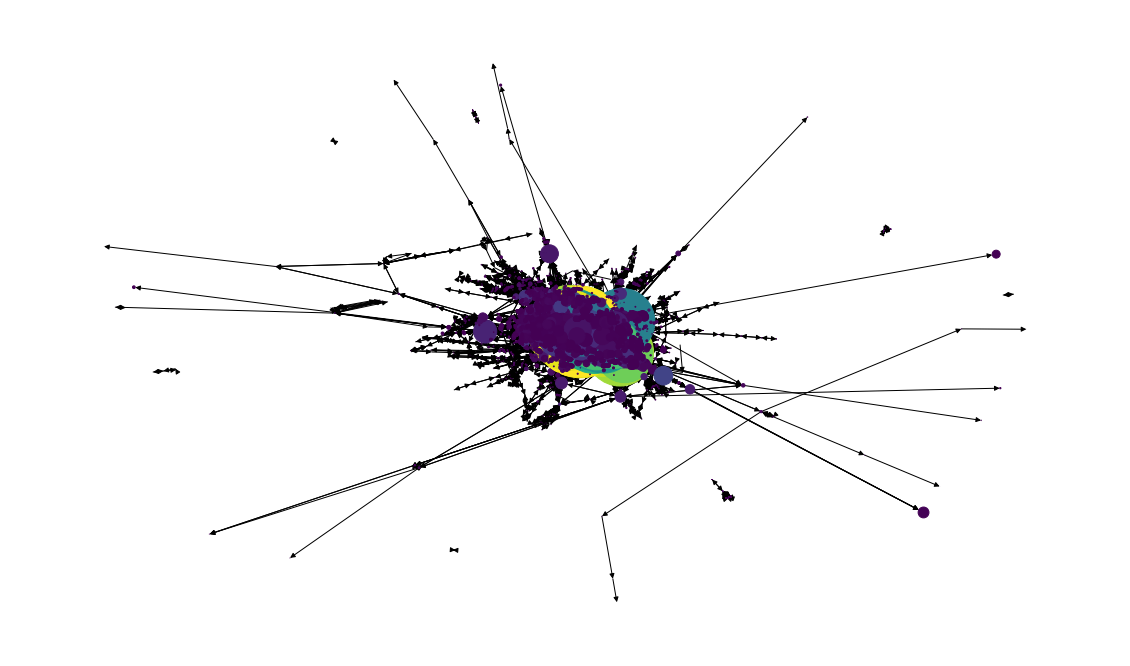

In [284]:
pos = nx.spring_layout(GRAPH)
eigCent = nx.eigenvector_centrality(GRAPH)
node_color = [20000.0 * GRAPH.degree(v) for v in GRAPH]
node_size =  [v * 50000 for v in eigCent.values()]
plt.figure(figsize=(20,12))
nx.draw_networkx(GRAPH, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()

In [170]:
e1 = sorted(eigCent, key=eigCent.get, reverse=True)[:5]
e1

['AMS', 'FRA', 'CDG', 'MUC', 'LHR']

In [171]:
airport_df4 = airport_df.copy()
airport_df4["Eigen_centrality"] = airport_df4["IATA"].map(eigCent)
airport_dfr4 = airport_df4.sort_values(by=['Eigen_centrality'], ascending=False)
airport_dfr4.head()

,Name,City,Country,IATA,Eigen_centrality
574,Amsterdam Airport Schiphol,Amsterdam,Netherlands,AMS,0.165909
336,Frankfurt am Main Airport,Frankfurt,Germany,FRA,0.165748
1346,Charles de Gaulle International Airport,Paris,France,CDG,0.159224
342,Munich Airport,Munich,Germany,MUC,0.148957
502,London Heathrow Airport,London,United Kingdom,LHR,0.137050


# ANALYSIS

 Plot Top 10 Countries with Most Airports 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



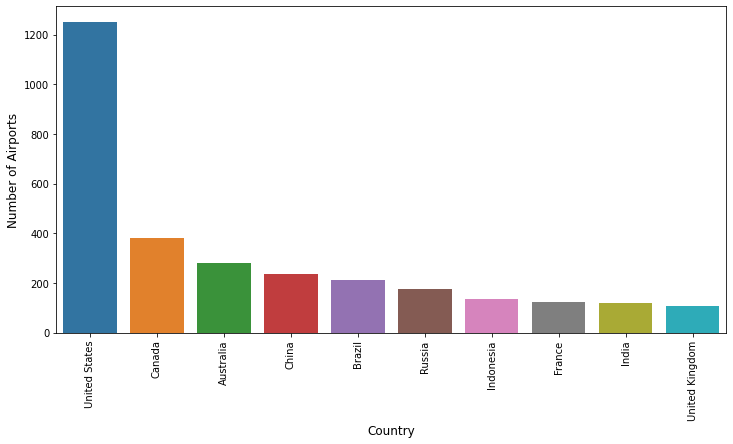

In [221]:
cnt_srs = airport_df['Country'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation='vertical')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Airports', fontsize=12)
plt.show()

Plot Top 10 Source Airports 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



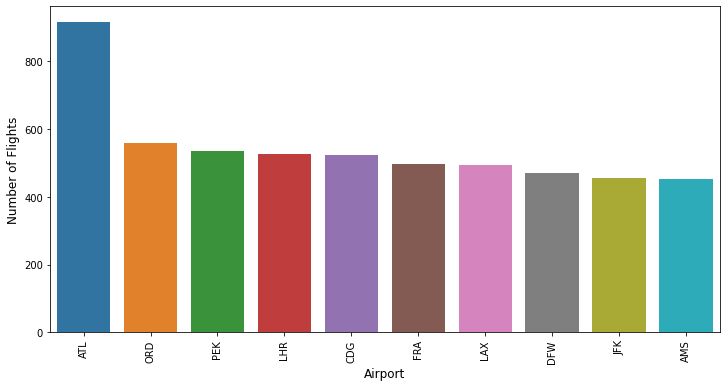

In [222]:
cnt_srs = G[' source airport'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation='vertical')
plt.xlabel('Airport', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.show()

Plot Top 10 Destination Airports 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



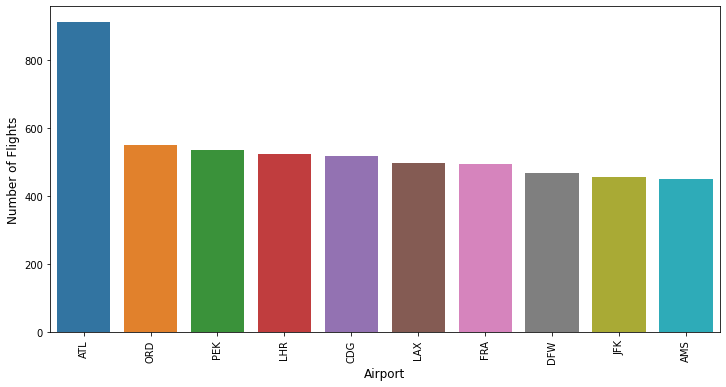

In [223]:
cnt_srs = G[' destination apirport'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation='vertical')
plt.xlabel('Airport', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.show()

Finding neighborhood airports

In [224]:
neigh = ['PEK','FMI','CGQ','LPB','VCP','DME','FRA', 'DXB', 'AMS']
for i in range(len(neigh)):
    all_neighbors = list(nx.classes.function.all_neighbors(GRAPH,neigh[i]))
    print("\nAll neighbors for Node ", str(neigh[i])," ---> ", str(all_neighbors))
    print("Count of neighbours:",len(all_neighbors))


All neighbors for Node  PEK  --->  ['CKG', 'CTU', 'WXN', 'ZHY', 'MNL', 'KMG', 'LUM', 'ORD', 'SEA', 'AUH', 'TXL', 'YVR', 'YYZ', 'CDG', 'ALG', 'HEL', 'LHR', 'TPE', 'ADD', 'ARN', 'BAV', 'BHY', 'BKK', 'CAI', 'CAN', 'CGO', 'CGQ', 'CHG', 'CIF', 'CJJ', 'CNX', 'CPH', 'CSX', 'CTS', 'CZX', 'DAT', 'DAX', 'DDG', 'DEL', 'DLC', 'DQA', 'DSN', 'DUS', 'DXB', 'DYG', 'EWR', 'FCO', 'FNJ', 'FOC', 'FRA', 'FUG', 'GMP', 'GVA', 'GYS', 'HAK', 'HET', 'HFE', 'HGH', 'HKG', 'HKT', 'HLD', 'HLH', 'HMI', 'HND', 'HNL', 'HRB', 'HYN', 'IAD', 'IAH', 'ICN', 'INC', 'IST', 'JDZ', 'JFK', 'JGS', 'JIU', 'JMU', 'KHN', 'KIX', 'KOW', 'KWE', 'KWL', 'LAX', 'LGW', 'LHW', 'LJG', 'LXA', 'LZH', 'MAD', 'MDG', 'MFM', 'MIG', 'MUC', 'MWX', 'MXP', 'NDG', 'NGB', 'NGO', 'NKG', 'NNG', 'NRT', 'NTG', 'OKA', 'PUS', 'PVG', 'REP', 'RGN', 'RLK', 'SFO', 'SGN', 'SHA', 'SHE', 'SIN', 'SVO', 'SWA', 'SYD', 'SYX', 'SZX', 'TAE', 'TAO', 'TGO', 'TLV', 'TNA', 'TXN', 'TYN', 'ULN', 'URC', 'VIE', 'WAW', 'WNZ', 'WUA', 'WUH', 'WUX', 'XFN', 'XIL', 'XIY', 'XMN', 'XNN

Top 5 airports of individual centralities

In [235]:
df2 = pd.DataFrame()
df2['betweeness_centrality'] = pd.Series(b1)
df2['closeness_centrality'] = pd.Series(c1)
df2['degree_centrality'] = pd.Series(d1)
df2['eigenvector_centrality'] = pd.Series(e1)
df2

,betweeness_centrality,closeness_centrality,degree_centrality,eigenvector_centrality
0,ANC,FRA,FRA,AMS
1,LAX,CDG,CDG,FRA
2,CDG,LHR,AMS,CDG
3,DXB,DXB,IST,MUC
4,FRA,AMS,ATL,LHR


In [226]:
df = pd.DataFrame(index=GRAPH.nodes())
df['betweeness_centrality'] = pd.Series(betCent)
df['closeness_centrality'] = pd.Series(cloCent)
df['degree_centrality'] = pd.Series(degCent)
df['eigenvector_centrality'] = pd.Series(eigCent)
df.head()

,betweeness_centrality,closeness_centrality,degree_centrality,eigenvector_centrality
AER,2.437452e-05,0.276686,0.010222,0.009110
KZN,4.911256e-05,0.278473,0.012266,0.008890
ASF,7.817094e-07,0.266837,0.004089,0.004766
MRV,2.958986e-05,0.286819,0.009346,0.009875
CEK,4.369093e-06,0.268607,0.008178,0.006755


In [227]:
mean_value = df.mean(axis=1)
df['mean_avg'] = mean_value
df.head()

,betweeness_centrality,closeness_centrality,degree_centrality,eigenvector_centrality,mean_avg
AER,2.437452e-05,0.276686,0.010222,0.009110,0.074011
KZN,4.911256e-05,0.278473,0.012266,0.008890,0.074919
ASF,7.817094e-07,0.266837,0.004089,0.004766,0.068923
MRV,2.958986e-05,0.286819,0.009346,0.009875,0.076517
CEK,4.369093e-06,0.268607,0.008178,0.006755,0.070886


In [ ]:
airport_dfs = airport_df.copy()
airport_dfs["betweeness_centrality"]  =  airport_dfs["IATA"].map(betCent)
airport_dfs["closeness_centrality"]   =  airport_dfs["IATA"].map(cloCent)
airport_dfs["degree_centrality"]      =  airport_dfs["IATA"].map(degCent)
airport_dfs["eigenvector_centrality"] =  airport_dfs["IATA"].map(eigCent)
airport_dfs["mean_average"]           =  airport_dfs["IATA"].map(mean_value)
airport_dfs.head()

Top 20 Busiest Airports based on Mean Average Score

In [178]:
airport_dfs1 = airport_dfs.sort_values(by=['mean_average'], ascending=False)
airport_dfs2 = airport_dfs1.head(20)
airport_dfs2

,Name,City,Country,IATA,betweeness_centrality,closeness_centrality,degree_centrality,eigenvector_centrality,mean_average
336,Frankfurt am Main Airport,Frankfurt,Germany,FRA,0.051000,0.392389,0.139311,0.165748,0.187112
1346,Charles de Gaulle International Airport,Paris,France,CDG,0.061703,0.389993,0.137266,0.159224,0.187047
574,Amsterdam Airport Schiphol,Amsterdam,Netherlands,AMS,0.042658,0.382932,0.135222,0.165909,0.181680
7629,Istanbul Airport,Istanbul,Turkey,IST,0.041219,0.371370,0.133470,0.129644,0.168926
502,London Heathrow Airport,London,United Kingdom,LHR,0.038385,0.388306,0.099883,0.137050,0.165906
2100,Dubai International Airport,Dubai,United Arab Emirates,DXB,0.059350,0.384084,0.108061,0.102745,0.163560
342,Munich Airport,Munich,Germany,MUC,0.015418,0.370252,0.110981,0.148957,0.161402
3630,Chicago O'Hare International Airport,Chicago,United States,ORD,0.047430,0.370376,0.119451,0.090182,0.156860
3170,Beijing Capital International Airport,Beijing,China,PEK,0.049167,0.369593,0.120327,0.083801,0.155722
3285,Los Angeles International Airport,Los Angeles,United States,LAX,0.066164,0.379042,0.086741,0.075881,0.151957


Pie Chart Representation of Top 20 Busiest Airports based on Mean Average 

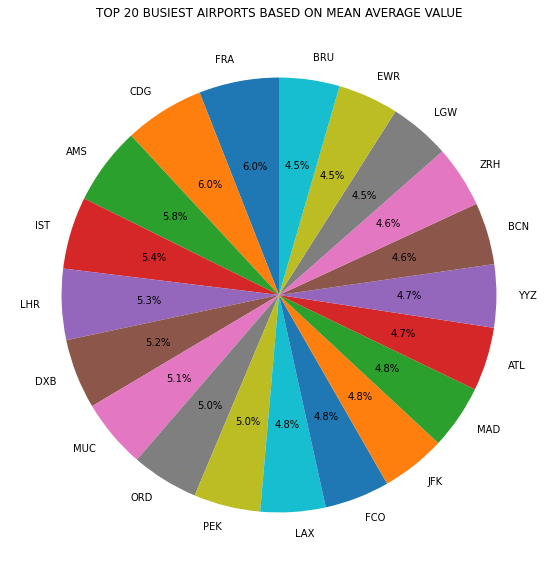

In [288]:
I = airport_dfs2["IATA"]
mean_avg1 = airport_dfs2["mean_average"]
fig = plt.figure(figsize =(10, 10))
plt.pie(mean_avg1,labels=I,autopct='%1.1f%%',startangle=90)
plt.title("TOP 20 BUSIEST AIRPORTS BASED ON MEAN AVERAGE VALUE")
plt.show()

Bar Chart Representation of Top 20 Busiest Airports based on Mean Average

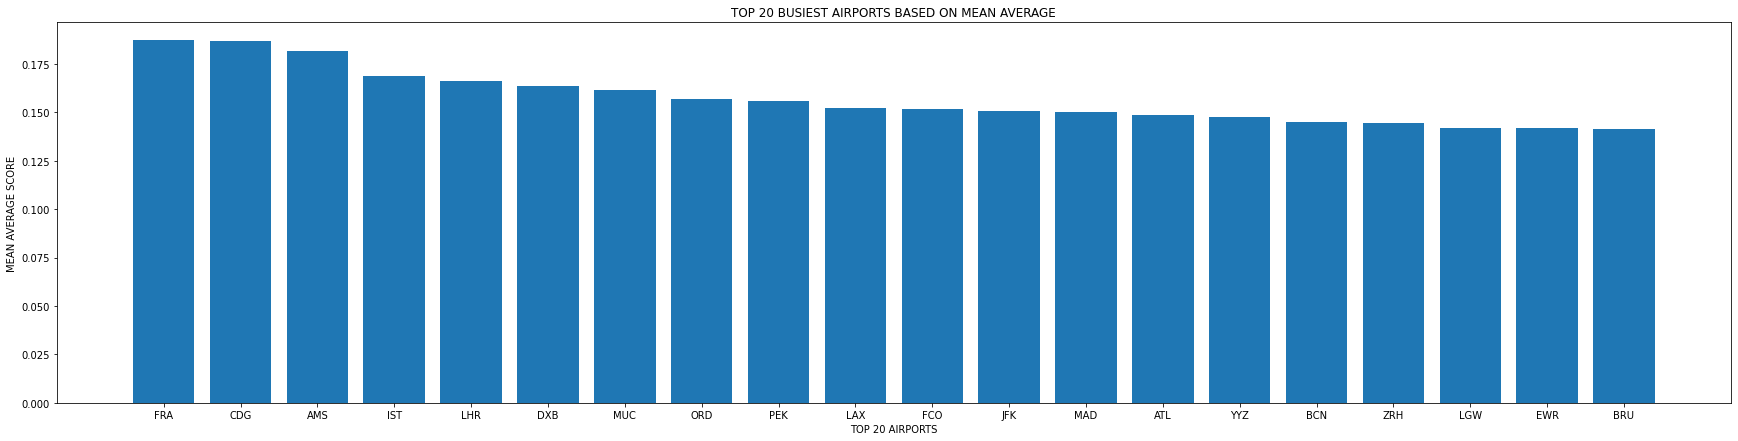

In [289]:
airport_IATA =airport_dfs2['IATA']
mean_average1 = airport_dfs2['mean_average'] 
fig = plt.figure(figsize =(30, 7)) 
  
plt.bar(airport_IATA, mean_average1) 
 
plt.xlabel("TOP 20 AIRPORTS") 
plt.ylabel("MEAN AVERAGE SCORE") 
plt.title("TOP 20 BUSIEST AIRPORTS BASED ON MEAN AVERAGE") 
plt.show()